In [21]:
from __future__ import division
import numpy as np
import os
import preprocess
from time import gmtime, strftime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

In [5]:
datetime = strftime("%Y-%m-%d %H:%M:%S", gmtime())
curr_dir = os.getcwd()
seqdir = curr_dir + "/seqs/"
seqfiles = os.listdir(seqdir)
props_file = "aa_propierties.csv"
add_props = True
seq_len = 200

In [6]:
dataset = preprocess.DataSet(seqdir, props_file, add_props, seq_len)

In [8]:
lengths = []
for subclass in dataset.raw_seqs:
    for seq in subclass:
        lengths.append(len(seq))

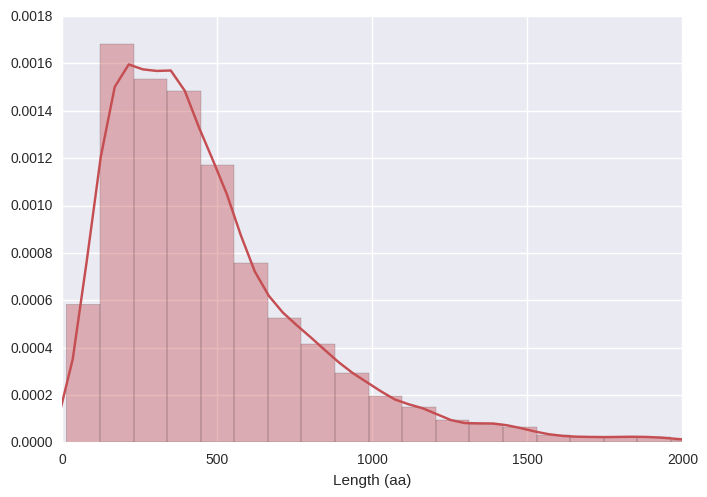

In [9]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
sns.distplot(lengths, axlabel= "Length (aa)", color="r")
plt.xlim([0,2000])

plt.show()

In [10]:
sum(i < 750 for i in lengths)/len(lengths)

0.8279912737036416

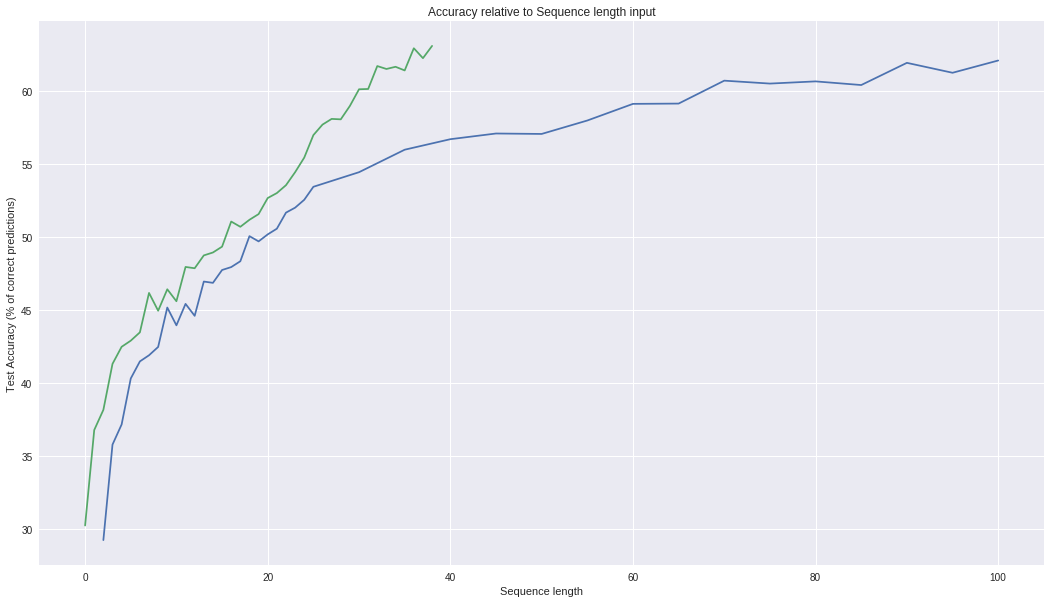

In [20]:
ls = np.concatenate([np.arange(2, 25), np.arange(25, 105, 5)])

acs = np.array([29.25, 35.79, 37.17, 40.32, 41.49, 41.91, 42.48, 45.18, 43.96, 45.43, 44.61, 46.96, 46.87, 47.75, 47.95,
                48.35, 50.07, 49.71, 50.19, 50.58, 51.68, 52.02, 52.56, 53.45, 54.45, 55.99, 56.71, 57.1, 57.07, 57.99,
                59.13, 59.15, 60.72, 60.52, 60.67, 60.42, 61.94, 61.26, 62.1])



#green_patch = mpatches.Patch(color='green', label='Convolutional')
#blue_patch = mpatches.Patch(color='blue', label='Fully-Connected')
#plt.legend(handles=[green_patch, blue_patch], loc= 4)

f, ax = plt.subplots(1, figsize=(18,10))
plt.xlabel("Sequence length")
plt.ylabel("Test Accuracy (% of correct predictions)")
# plt.ylim([0,100])
plt.title("Accuracy relative to Sequence length input")
plt.plot(ls, acs, acs + 1, "-")

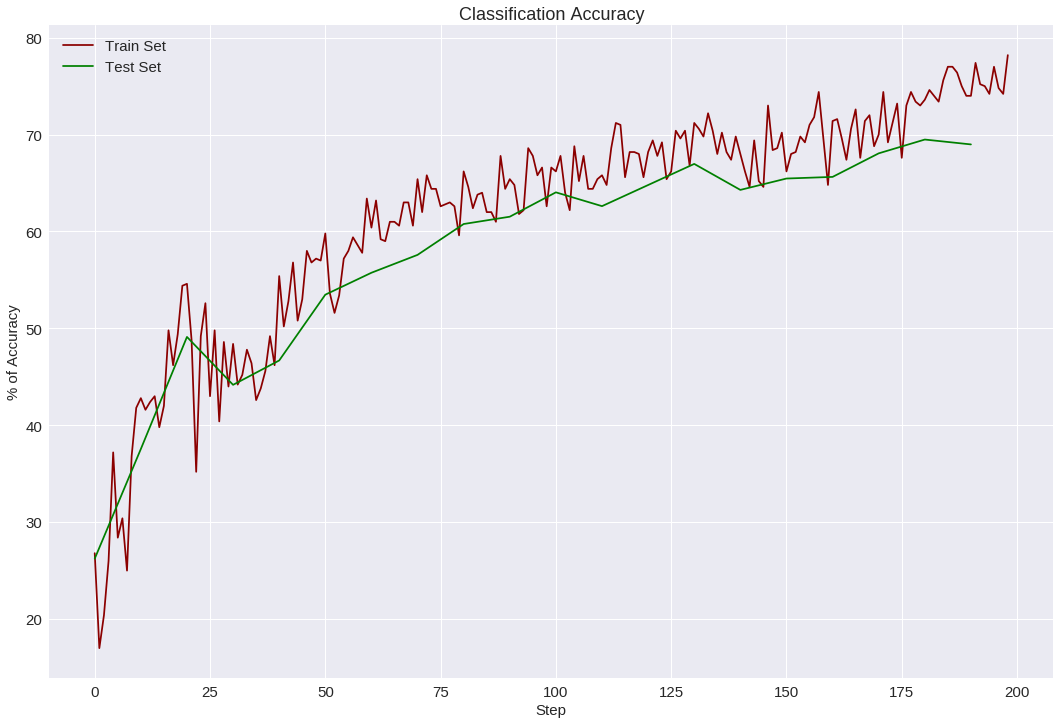

In [56]:
sns.set(color_codes=True)

curr_dir = os.getcwd()
plots_dir = curr_dir + "/plots/"
train_data = pd.read_csv(plots_dir + "train_data.csv")
test_data =  pd.read_csv(plots_dir + "test_data.csv")
train_steps = train_data["Step"]
train_values = train_data["Value"] * 100
test_steps = test_data["Step"]
test_values = test_data["Value"] * 100
f, ax = plt.subplots(1, figsize=(18,12))


ax.plot(train_steps, train_values, ms=8, color="darkred", label = "Train Set")

ax.plot(test_steps, test_values, ms=8, color="green", label = "Test Set")


ax.legend(loc='best', frameon=False, fontsize=15)
plt.xlabel("Step", fontsize=15)
plt.ylabel("% of Accuracy", fontsize=15)
plt.title("Classification Accuracy", fontsize=18)
plt.tick_params(labelsize=15)
plt.savefig('Accuracy Plot.png')